# Zero Flow Spatial Analysis

The purpose of this code is to analyze number of zero flow days by huc's and produce maps at different time periods.  It also has the capability to only select huc's with stream gages at their respective outlets.

Files needed to run this:
 -  huc{#}flowlines_order3plus.shp'
 - /zeroflowdays_peryear_19802025.csv

 These files are produced after running the pre-processing files.

In [1]:
# Packages and paths

import os
import numpy as np
import pandas as pd
#import earthpy as et
import scipy.stats as sp
import geopandas as gp
import matplotlib.pyplot as plt

# Local paths
# inputpath = '../../Data/Input/RawData'
inputpath = '../../Data/Input'
outputpath = '../../Data/Output/Local'

# Function to calculate slope using linear regression
def calculate_slope(y):
    x = np.arange(len(y))
    slope, _ = np.polyfit(x, y, 1)
    return slope

Read in the files

In [2]:
all_data = pd.read_csv(outputpath+"/zeroflowdays_peryear_19802025.csv")
all_data

,Unnamed: 0.1,Unnamed: 0,ID,Year,Zero_Flow,Agency,Name
0,837,837,9379025,1999,0,NaN,NaN
1,1870,0,9379025,2000,201,USGS,"CHINLE CREEK AT CHINLE, AZ"
2,1871,1,9379025,2001,201,USGS,"CHINLE CREEK AT CHINLE, AZ"
3,1872,2,9379025,2002,244,USGS,"CHINLE CREEK AT CHINLE, AZ"
4,1873,3,9379025,2003,168,USGS,"CHINLE CREEK AT CHINLE, AZ"
...,...,...,...,...,...,...,...
6303,6303,4433,351848111323301,2014,251,NaN,NaN
6304,6304,4434,352025111332401,2011,86,NaN,NaN
6305,6305,4435,352025111332401,2012,347,NaN,NaN
6306,6306,4436,352025111332401,2013,347,NaN,NaN


To make zero flows per decade and by stream gauge

In [7]:
all_data['Year'] = pd.to_datetime(all_data['Year'], format='%Y')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0.1  6308 non-null   int64         
 1   Unnamed: 0    6308 non-null   int64         
 2   ID            6308 non-null   int64         
 3   Year          6308 non-null   datetime64[ns]
 4   Zero_Flow     6308 non-null   int64         
 5   Agency        5248 non-null   object        
 6   Name          5248 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 345.1+ KB


In [8]:
all_data['Decade'] = (all_data['Year'].dt.year // 10) * 10  # Rounds to nearest decade

In [9]:
all_data

,Unnamed: 0.1,Unnamed: 0,ID,Year,Zero_Flow,Agency,Name,Decade
0,837,837,9379025,1999-01-01,0,NaN,NaN,1990
1,1870,0,9379025,2000-01-01,201,USGS,"CHINLE CREEK AT CHINLE, AZ",2000
2,1871,1,9379025,2001-01-01,201,USGS,"CHINLE CREEK AT CHINLE, AZ",2000
3,1872,2,9379025,2002-01-01,244,USGS,"CHINLE CREEK AT CHINLE, AZ",2000
4,1873,3,9379025,2003-01-01,168,USGS,"CHINLE CREEK AT CHINLE, AZ",2000
...,...,...,...,...,...,...,...,...
6303,6303,4433,351848111323301,2014-01-01,251,NaN,NaN,2010
6304,6304,4434,352025111332401,2011-01-01,86,NaN,NaN,2010
6305,6305,4435,352025111332401,2012-01-01,347,NaN,NaN,2010
6306,6306,4436,352025111332401,2013-01-01,347,NaN,NaN,2010


In [26]:
zero_flow = pd.pivot_table(all_data, index='ID', columns="Decade", values="Zero_Flow", dropna=False, aggfunc=np.mean)
zero_flow.reset_index(inplace=True)
zero_flow

Decade,ID,1980,1990,2000,2010,2020
0,9379025,NaN,0.000000,194.714286,NaN,116.000000
1,9379050,NaN,0.000000,6.714286,NaN,NaN
2,9379180,NaN,74.750000,168.000000,NaN,NaN
3,9379200,31.5,33.727273,91.800000,65.90,88.500000
4,9379910,0.0,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...
265,9537500,NaN,NaN,271.375000,281.00,248.000000
266,9537700,NaN,NaN,NaN,NaN,85.500000
267,94985005,NaN,NaN,83.666667,163.60,128.333333
268,351848111323301,NaN,NaN,NaN,228.25,NaN


In [27]:
zero_flow.to_csv(outputpath+'/zeroflowdays_perdecade_bystreamgauge.csv')

Now for doing things by huc and outlet

In [6]:
# Specify which huc you want
huc_num = '12'

<Axes: >

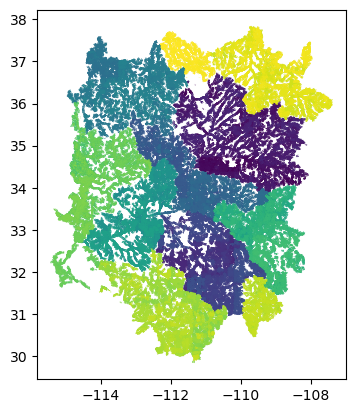

In [5]:
# Read in the shapefile

# filename_shapeile = 'georeg_reproject_fixed.shp'
# filename_shapeile = '/flowlines_order4plus.shp'
filename_shapeile = '/huc'+huc_num+'flowlines_order3plus.shp'
# filepath = os.path.join(shapepath, filename_shapeile)
filepath = os.path.join(outputpath+filename_shapeile)
shapefile = gp.read_file(filepath)
shapefile.plot(cmap='viridis')


Take a look at the columns and variables

In [6]:
shapefile.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 301880 entries, 0 to 301879
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   permanent_  301880 non-null  object  
 1   gnis_name   90569 non-null   object  
 2   reachcode   301880 non-null  object  
 3   streamorde  301880 non-null  int64   
 4   ID          16390 non-null   object  
 5   huc12       301880 non-null  object  
 6   huc_name    301880 non-null  object  
 7   fcode       301880 non-null  int64   
 8   hydroseq    301880 non-null  float64 
 9   geometry    301880 non-null  geometry
dtypes: float64(1), geometry(1), int64(2), object(6)
memory usage: 23.0+ MB


This code only selects reaches that are not a canal or pipeline.  Includes rivers/streams, drainageways and artificial pathways

<Axes: >

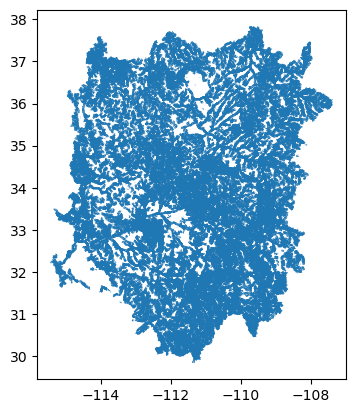

In [7]:
df = shapefile.copy()
df = df[df['fcode']>=46000]
df.plot()

This bit of code only selects the outlets in each huc

<Axes: >

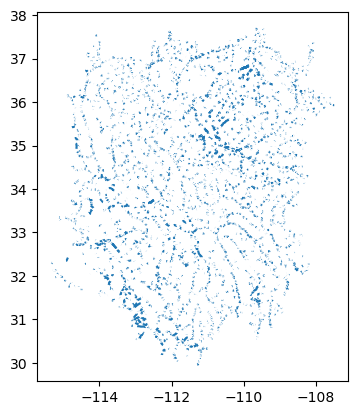

In [8]:
outlets_df = df.loc[df.groupby('huc'+huc_num)['hydroseq'].idxmin()]
# outlets_df = df.loc[df.groupby('huc12')['streamorde'].idxmin()]
outlets_df.plot()

In [9]:
outlets_df.to_file((outputpath+f'/huc{huc_num}_outlets.shp'))

In [10]:
# test = shapefile['ID'].dropna()
test = outlets_df.dropna(subset=['ID'])
test

,permanent_,gnis_name,reachcode,streamorde,ID,huc12,huc_name,fcode,hydroseq,geometry
299454,79240047,Last Chance Creek,14070006000082,5,372030111310801,140700060302,Paradise Canyon,46003,4.100010e+13,"LINESTRING Z (-111.57011 37.38062 0.00000, -11..."
299631,79244923,Warm Creek,14070006000111,5,370733111290201,140700060503,Tibbet Canyon-Warm Creek,55800,4.100010e+13,"LINESTRING Z (-111.49753 37.13436 0.00000, -11..."
298288,79248431,Colorado River,14070006009104,10,AZ10307,140700061008,Glen Canyon Dam-Lake Powell,55800,4.100010e+13,"LINESTRING Z (-111.48583 36.95489 0.00000, -11..."
298565,79251113,NaN,14070006000728,5,365058111322200,140700061103,Water Holes Canyon,55800,4.100010e+13,"LINESTRING Z (-111.54339 36.85019 0.00000, -11..."
297218,79070830,Paria River,14070007000186,6,373142112023601,140700070105,Henrieville Creek,55800,4.100010e+13,"LINESTRING Z (-112.04132 37.53997 0.00000, -11..."
...,...,...,...,...,...,...,...,...,...,...
257215,108530042,Pia Oik Wash,15080102000012,5,15080102,150801020103,Ali Chuk Wash-Menagers Lake,46003,4.000010e+13,"LINESTRING Z (-112.54540 31.81852 0.00000, -11..."
272646,139035056,NaN,15080301000349,5,09537000,150803010201,Rucker Canyon,46003,4.000010e+13,"LINESTRING Z (-109.40981 31.75369 0.00000, -10..."
267812,139034233,NaN,15080301000008,5,09537300,150803010409,Poverty Flat,46007,4.000010e+13,"LINESTRING Z (-109.53576 31.43601 0.00000, -10..."
272860,139034592,NaN,15080301000168,5,09537400,150803010411,Sacred Heart Cemetery,46007,4.000010e+13,"LINESTRING Z (-109.56379 31.37625 0.00000, -10..."


In [11]:
# Keep only rows where Combo_ID is fully numeric
test = test[test['ID'].str.isnumeric()]

# %% Converting ID to int
test['ID'] = test['ID'].astype(np.int64, errors = 'raise')
test.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 282 entries, 299454 to 272879
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   permanent_  282 non-null    object  
 1   gnis_name   230 non-null    object  
 2   reachcode   282 non-null    object  
 3   streamorde  282 non-null    int64   
 4   ID          282 non-null    int64   
 5   huc12       282 non-null    object  
 6   huc_name    282 non-null    object  
 7   fcode       282 non-null    int64   
 8   hydroseq    282 non-null    float64 
 9   geometry    282 non-null    geometry
dtypes: float64(1), geometry(1), int64(3), object(5)
memory usage: 24.2+ KB


c:\Users\det19\.conda\envs\azgwspatialanalysis\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [12]:
test['fcode'].describe()

count      282.000000
mean     49651.989362
std       4743.665285
min      46003.000000
25%      46003.000000
50%      46006.000000
75%      55800.000000
max      55800.000000
Name: fcode, dtype: float64

In [13]:
test['hydroseq'].unique()

array([4.10001e+13, 4.10001e+13, 4.10001e+13, 4.10001e+13, 4.10001e+13,
       4.10005e+13, 4.10005e+13, 4.10005e+13, 4.10005e+13, 4.10005e+13,
       4.10005e+13, 4.10005e+13, 4.10005e+13, 4.10005e+13, 4.10005e+13,
       4.10005e+13, 4.10005e+13, 4.10005e+13, 4.10005e+13, 4.10005e+13,
       4.10005e+13, 4.10005e+13, 4.10005e+13, 4.10005e+13, 4.10005e+13,
       4.00005e+13, 4.00005e+13, 4.00005e+13, 4.00005e+13, 4.00005e+13,
       4.00005e+13, 4.00005e+13, 4.00005e+13, 4.00005e+13, 4.00005e+13,
       4.00005e+13, 4.00005e+13, 4.00005e+13, 4.00005e+13, 4.00005e+13,
       4.00005e+13, 4.00005e+13, 4.00005e+13, 4.00005e+13, 4.00005e+13,
       4.00005e+13, 4.00005e+13, 4.00005e+13, 4.00005e+13, 4.00005e+13,
       4.00005e+13, 4.00005e+13, 4.00005e+13, 4.00005e+13, 4.00005e+13,
       4.00005e+13, 4.00005e+13, 4.00005e+13, 4.00005e+13, 4.00005e+13,
       4.00005e+13, 4.00005e+13, 4.00005e+13, 4.00005e+13, 4.00005e+13,
       4.00005e+13, 4.00005e+13, 4.00005e+13, 4.00005e+13, 4.000

<Axes: >

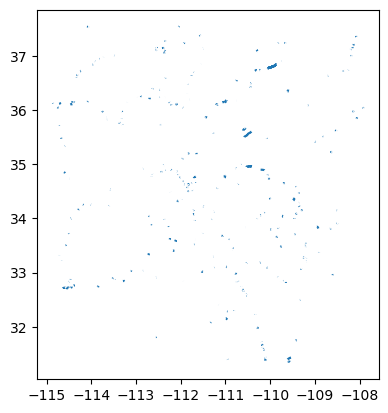

In [14]:
test.plot()

In [7]:
# Define some things about your file

StudyArea = "HUC"+huc_num+"s"
# Naming_col = "Name"
Naming_col = "huc"+huc_num

In [16]:
# Pull out the columns you need
# Use this for subbasins:
# reg_list = static_geo[['Combo_ID', Naming_col+'_right','WELL_DEPTH','WELL_TYPE_']]

# Use this or cities:
reg_list = test[['ID', Naming_col,'gnis_name']]
# reg_list

# %% Converting Combo_ID to int
# reg_list['Combo_ID'] = reg_list['Combo_ID'].astype(np.int64, errors = 'raise')

In [17]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  6308 non-null   int64 
 1   Unnamed: 0    6308 non-null   int64 
 2   ID            6308 non-null   int64 
 3   Year          6308 non-null   int64 
 4   Zero_Flow     6308 non-null   int64 
 5   Agency        5248 non-null   object
 6   Name          5248 non-null   object
dtypes: int64(5), object(2)
memory usage: 345.1+ KB


In [18]:
reg_list.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282 entries, 299454 to 272879
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         282 non-null    int64 
 1   huc12      282 non-null    object
 2   gnis_name  230 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.8+ KB


In [19]:
# Merging the Timeseries and the shapefile static database
combo = all_data.merge(reg_list, how="inner")
combo.info()

# %% set index to Combo_ID
combo.set_index('ID', inplace=True)
combo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  1443 non-null   int64 
 1   Unnamed: 0    1443 non-null   int64 
 2   ID            1443 non-null   int64 
 3   Year          1443 non-null   int64 
 4   Zero_Flow     1443 non-null   int64 
 5   Agency        1221 non-null   object
 6   Name          1221 non-null   object
 7   huc12         1443 non-null   object
 8   gnis_name     1354 non-null   object
dtypes: int64(5), object(4)
memory usage: 101.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1443 entries, 9383100 to 9537500
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  1443 non-null   int64 
 1   Unnamed: 0    1443 non-null   int64 
 2   Year          1443 non-null   int64 
 3   Zero_Flow     1443 non-null   int64 
 4   Agency       

In [20]:
combo

,Unnamed: 0.1,Unnamed: 0,Year,Zero_Flow,Agency,Name,huc12,gnis_name
ID,,,,,,,,
9383100,866,866,1985,0,NaN,NaN,150100010508,Colorado River
9383100,867,867,1989,0,NaN,NaN,150100010508,Colorado River
9383100,868,868,1990,0,NaN,NaN,150100010508,Colorado River
9383100,869,869,1991,0,NaN,NaN,150100010508,Colorado River
9383100,870,870,1992,0,NaN,NaN,150100010508,Colorado River
...,...,...,...,...,...,...,...,...
9537500,6274,4404,2021,259,USGS,"WHITEWATER DRAW NEAR DOUGLAS, AZ.",150803010412,NaN
9537500,6275,4405,2022,250,USGS,"WHITEWATER DRAW NEAR DOUGLAS, AZ.",150803010412,NaN
9537500,6276,4406,2023,348,USGS,"WHITEWATER DRAW NEAR DOUGLAS, AZ.",150803010412,NaN


In [21]:
combo['gnis_name'].unique()

array(['Colorado River', nan, 'Little Colorado River', 'Chevelon Creek',
       'Polacca Wash', 'Jeddito Wash', 'Bright Angel Creek',
       'Hermit Creek', 'Diamond Creek', 'Virgin River',
       'Bill Williams River', 'Main Canal', 'San Simon River',
       'Gila River', 'San Pedro River', 'Santa Cruz River',
       'Brawley Wash', 'Black River', 'Rock Creek', 'Corduroy Creek',
       'Cibecue Creek', 'Salt River', 'Tonto Creek', 'Verde River',
       'Wet Beaver Creek', 'Wet Bottom Creek', 'Cave Creek',
       'Agua Fria River', 'New River', 'Hassayampa River'], dtype=object)

In [22]:
huc_streams = pd.pivot_table(combo, index=[Naming_col], columns=["Year"], values=["Zero_Flow"], dropna=False, aggfunc=np.mean)
huc_streams

Zero_Flow                                                   \
Year              1980 1985 1986 1987  1988   1989   1990   1991   1992   
huc12                                                                     
150100010508       NaN  0.0  NaN  NaN   NaN    0.0    0.0    0.0    0.0   
150100010607       NaN  NaN  NaN  NaN   NaN    NaN    0.0    0.0    0.0   
150100010608       NaN  NaN  NaN  NaN   NaN    NaN    0.0    0.0    0.0   
150100020101       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150100020405       NaN  NaN  NaN  NaN   NaN    0.0    0.0    0.0    0.0   
150100020908       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150100020909       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150100100208       NaN  NaN  4.0  0.0   0.0    0.0    0.0    0.0    0.0   
150100100602       NaN  NaN  4.0  0.0   0.0    0.0    0.0    0.0    0.0   
150200010403       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150200020103       NaN  NaN  NaN  0.0   0.0    0.0    0.0    0.0    NaN   
150200020709       NaN  NaN  NaN  0.0   0.0    0.0    0.0    0.0    0.0   
150200080206       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150200080510       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150200080611       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150200100110       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150200130402       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150200140204       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150301040305       NaN  NaN  NaN  0.5  39.0   59.0    3.0   27.0   24.0   
150301040306       NaN  NaN  NaN  0.5  39.0   59.0    3.0   27.0   24.0   
150301070105       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150302040202       NaN  NaN  NaN  0.0   0.0    0.0    0.0    5.0    2.5   
150302040409       NaN  NaN  NaN  NaN   NaN  151.0  118.0  122.0   34.0   
150400050909       NaN  NaN  NaN  0.0   0.0   51.5    0.0    0.0    0.0   
150400050910       NaN  NaN  NaN  0.0   0.0   51.5    0.0    0.0    0.0   
150400060808       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150501000111       NaN  NaN  NaN  0.0   0.0    0.0    0.0    0.0    0.0   
150501000207       NaN  NaN  NaN  0.0   0.0    0.0    NaN    0.0    0.0   
150501000208       NaN  NaN  NaN  0.0   0.0    0.0    NaN    0.0    0.0   
150501000711       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150502020507       NaN  NaN  NaN  NaN   NaN    NaN   78.0   63.0    NaN   
150503010908       NaN  NaN  NaN  NaN   NaN    3.0   41.0    0.0  122.0   
150503040405       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN  137.0   
150601010308       NaN  NaN  NaN  0.0   0.0    0.0    0.0    0.0    0.0   
150601020301       NaN  NaN  NaN  0.0   0.0    0.0    0.0    0.0    0.0   
150601030108       NaN  NaN  NaN  0.0   0.0    0.0    0.0    0.0    0.0   
150601030904       NaN  NaN  NaN  0.0   0.0    0.0    0.0    0.0    0.0   
150601040105       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150601050311       NaN  NaN  NaN  0.0   2.0   11.5   16.0    0.0    0.0   
150601060306       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150602020108       NaN  NaN  NaN  0.0   0.0    0.0    0.0    0.0    0.0   
150602020607       NaN  NaN  NaN  NaN   0.0    0.0    0.0    0.0    0.0   
150602030405       NaN  NaN  0.0  0.0   0.0   56.0   51.0  134.0   38.0   
150602030408       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150602030409       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150701020206       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150701020605       0.0  NaN  NaN  NaN  36.0    NaN   61.0    NaN    NaN   
150701020607       0.0  NaN  NaN  NaN  36.0    NaN   61.0    NaN    NaN   
150701020808       NaN  NaN  NaN  NaN   NaN    NaN  139.0  103.0  310.0   
150701030311       NaN  NaN  NaN  NaN   NaN    NaN    0.0    5.0    0.0   
150701030507       NaN  NaN  NaN  NaN 

In [23]:
huc_streams.index.name = None
huc_streams

Zero_Flow                                                   \
Year              1980 1985 1986 1987  1988   1989   1990   1991   1992   
150100010508       NaN  0.0  NaN  NaN   NaN    0.0    0.0    0.0    0.0   
150100010607       NaN  NaN  NaN  NaN   NaN    NaN    0.0    0.0    0.0   
150100010608       NaN  NaN  NaN  NaN   NaN    NaN    0.0    0.0    0.0   
150100020101       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150100020405       NaN  NaN  NaN  NaN   NaN    0.0    0.0    0.0    0.0   
150100020908       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150100020909       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150100100208       NaN  NaN  4.0  0.0   0.0    0.0    0.0    0.0    0.0   
150100100602       NaN  NaN  4.0  0.0   0.0    0.0    0.0    0.0    0.0   
150200010403       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150200020103       NaN  NaN  NaN  0.0   0.0    0.0    0.0    0.0    NaN   
150200020709       NaN  NaN  NaN  0.0   0.0    0.0    0.0    0.0    0.0   
150200080206       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150200080510       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150200080611       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150200100110       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150200130402       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150200140204       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150301040305       NaN  NaN  NaN  0.5  39.0   59.0    3.0   27.0   24.0   
150301040306       NaN  NaN  NaN  0.5  39.0   59.0    3.0   27.0   24.0   
150301070105       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150302040202       NaN  NaN  NaN  0.0   0.0    0.0    0.0    5.0    2.5   
150302040409       NaN  NaN  NaN  NaN   NaN  151.0  118.0  122.0   34.0   
150400050909       NaN  NaN  NaN  0.0   0.0   51.5    0.0    0.0    0.0   
150400050910       NaN  NaN  NaN  0.0   0.0   51.5    0.0    0.0    0.0   
150400060808       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150501000111       NaN  NaN  NaN  0.0   0.0    0.0    0.0    0.0    0.0   
150501000207       NaN  NaN  NaN  0.0   0.0    0.0    NaN    0.0    0.0   
150501000208       NaN  NaN  NaN  0.0   0.0    0.0    NaN    0.0    0.0   
150501000711       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150502020507       NaN  NaN  NaN  NaN   NaN    NaN   78.0   63.0    NaN   
150503010908       NaN  NaN  NaN  NaN   NaN    3.0   41.0    0.0  122.0   
150503040405       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN  137.0   
150601010308       NaN  NaN  NaN  0.0   0.0    0.0    0.0    0.0    0.0   
150601020301       NaN  NaN  NaN  0.0   0.0    0.0    0.0    0.0    0.0   
150601030108       NaN  NaN  NaN  0.0   0.0    0.0    0.0    0.0    0.0   
150601030904       NaN  NaN  NaN  0.0   0.0    0.0    0.0    0.0    0.0   
150601040105       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150601050311       NaN  NaN  NaN  0.0   2.0   11.5   16.0    0.0    0.0   
150601060306       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150602020108       NaN  NaN  NaN  0.0   0.0    0.0    0.0    0.0    0.0   
150602020607       NaN  NaN  NaN  NaN   0.0    0.0    0.0    0.0    0.0   
150602030405       NaN  NaN  0.0  0.0   0.0   56.0   51.0  134.0   38.0   
150602030408       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150602030409       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150701020206       NaN  NaN  NaN  NaN   NaN    NaN    NaN    NaN    NaN   
150701020605       0.0  NaN  NaN  NaN  36.0    NaN   61.0    NaN    NaN   
150701020607       0.0  NaN  NaN  NaN  36.0    NaN   61.0    NaN    NaN   
150701020808       NaN  NaN  NaN  NaN   NaN    NaN  139.0  103.0  310.0   
150701030311       NaN  NaN  NaN  NaN   NaN    NaN    0.0    5.0    0.0   
150701030507       NaN  NaN  NaN  NaN   NaN    NaN    9.0    0.0    0.0   
150702010803       NaN  NaN  NaN  NaN 

In [24]:
huc_streams.to_csv(outputpath+f'/{Naming_col}_average_flow_onlyoutlets.csv')

In [8]:
# Now to read in that file
filename_ts = f'/{Naming_col}_average_flow_onlyoutlets.csv'
annual_db = pd.read_csv(outputpath+filename_ts, header=1, index_col=0)

#Block to do some formatting
annual_db = annual_db[0:168102]
annual_db.index = annual_db.index.astype('int64')
annual_db2 = annual_db.reset_index(inplace=True)
annual_db2 = annual_db.rename(columns = {'Year':'index'})
annual_db2.set_index('index', inplace=True)
annual_db2.head()

,1980,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
index,,,,,,,,,,,,,,,,,,,,,
150100010508,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150100010607,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150100010608,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150100020101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
150100020405,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
i = annual_db2.copy()
# del i['WELL_DEPTH']
f = i.transpose()
# f
f.reset_index(inplace=True)

f['index'] = pd.to_numeric(f['index'])
f['index'] = f['index'].astype(int)
f.set_index('index', inplace=True)
f.info()
f.index.name = None
cat_wl2 = f
cat_wl2

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 1980 to 2025
Data columns (total 54 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   150100010508  15 non-null     float64
 1   150100010607  4 non-null      float64
 2   150100010608  4 non-null      float64
 3   150100020101  6 non-null      float64
 4   150100020405  6 non-null      float64
 5   150100020908  33 non-null     float64
 6   150100020909  33 non-null     float64
 7   150100100208  40 non-null     float64
 8   150100100602  40 non-null     float64
 9   150200010403  5 non-null      float64
 10  150200020103  38 non-null     float64
 11  150200020709  39 non-null     float64
 12  150200080206  22 non-null     float64
 13  150200080510  20 non-null     float64
 14  150200080611  25 non-null     float64
 15  150200100110  31 non-null     float64
 16  150200130402  27 non-null     float64
 17  150200140204  13 non-null     float64
 18  150301040305  12 non-null     fl

index,150100010508,150100010607,150100010608,150100020101,150100020405,150100020908,150100020909,150100100208,150100100602,150200010403,...,150602030409,150701020206,150701020605,150701020607,150701020808,150701030311,150701030507,150702010803,150702011502,150803010412
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,36.0,36.0,NaN,NaN,NaN,NaN,0.0,NaN
1989,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1990,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,61.0,61.0,139.0,0.0,9.0,NaN,0.0,NaN
1991,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,103.0,5.0,0.0,NaN,0.0,NaN
1992,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,310.0,0.0,0.0,NaN,0.0,NaN
1993,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,149.0,0.0,0.0,NaN,0.0,NaN


In [10]:
Min_year_of_Study = 1980
Max_year_of_Study = 2024

# Water Analysis period
wlanalysis_period = cat_wl2[(cat_wl2.index>=Min_year_of_Study)&(cat_wl2.index<=Max_year_of_Study)]
wlanalysis_period.head(25)

index,150100010508,150100010607,150100010608,150100020101,150100020405,150100020908,150100020909,150100100208,150100100602,150200010403,...,150602030409,150701020206,150701020605,150701020607,150701020808,150701030311,150701030507,150702010803,150702011502,150803010412
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,36.0,36.0,NaN,NaN,NaN,NaN,0.0,NaN
1989,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1990,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,61.0,61.0,139.0,0.0,9.0,NaN,0.0,NaN
1991,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,103.0,5.0,0.0,NaN,0.0,NaN
1992,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,310.0,0.0,0.0,NaN,0.0,NaN
1993,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,149.0,0.0,0.0,NaN,0.0,NaN


In [11]:
wlanalysis_period.columns

Index([150100010508, 150100010607, 150100010608, 150100020101, 150100020405,
       150100020908, 150100020909, 150100100208, 150100100602, 150200010403,
       150200020103, 150200020709, 150200080206, 150200080510, 150200080611,
       150200100110, 150200130402, 150200140204, 150301040305, 150301040306,
       150301070105, 150302040202, 150302040409, 150400050909, 150400050910,
       150400060808, 150501000111, 150501000207, 150501000208, 150501000711,
       150502020507, 150503010908, 150503040405, 150601010308, 150601020301,
       150601030108, 150601030904, 150601040105, 150601050311, 150601060306,
       150602020108, 150602020607, 150602030405, 150602030408, 150602030409,
       150701020206, 150701020605, 150701020607, 150701020808, 150701030311,
       150701030507, 150702010803, 150702011502, 150803010412],
      dtype='object', name='index')

In [12]:
wlanalysis_period.columns = wlanalysis_period.columns.astype(str)

         150100010508  150100010607  150100010608  150100020101  150100020405  \
slope             NaN           NaN           NaN           NaN           NaN   
int               NaN           NaN           NaN           NaN           NaN   
rsq               NaN           NaN           NaN           NaN           NaN   
p_val             NaN           NaN           NaN           NaN           NaN   
std_err           NaN           NaN           NaN           NaN           NaN   
mean              NaN           NaN           NaN           NaN           NaN   
var               NaN           NaN           NaN           NaN           NaN   
sum               NaN           NaN           NaN           NaN           NaN   

         150100020908  150100020909  150100100208  150100100602  150200010403  \
slope             NaN           NaN           NaN           NaN           NaN   
int               NaN           NaN           NaN           NaN           NaN   
rsq               NaN      

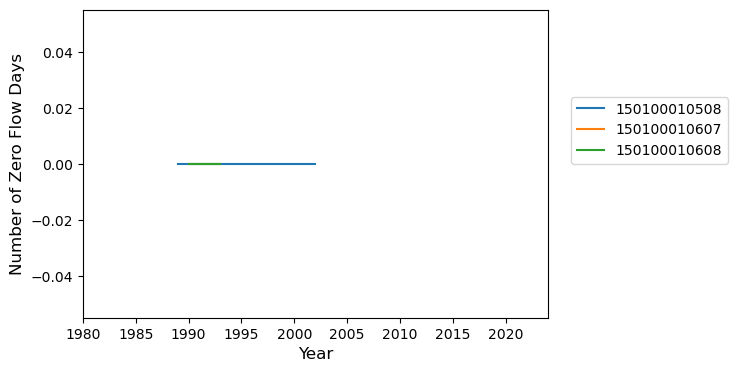

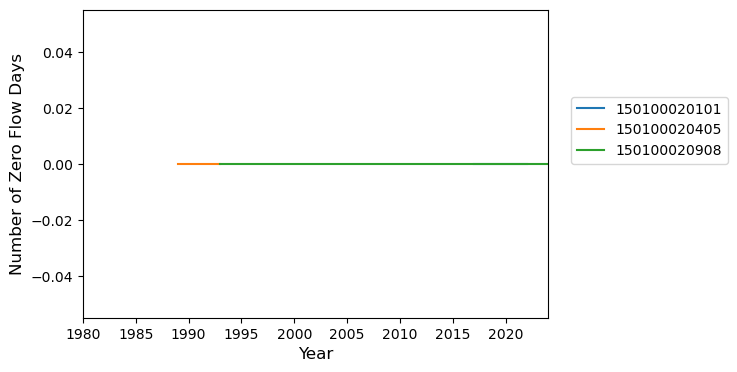

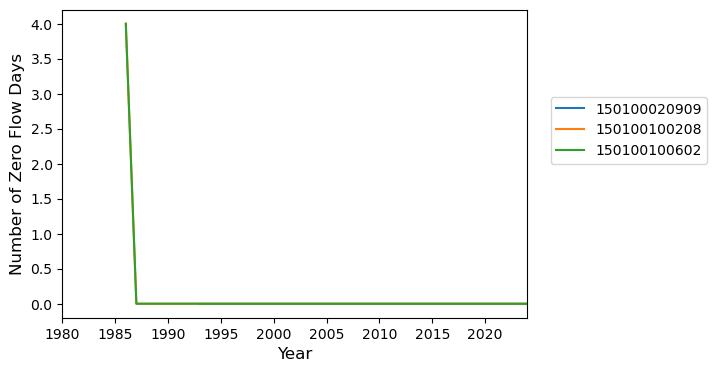

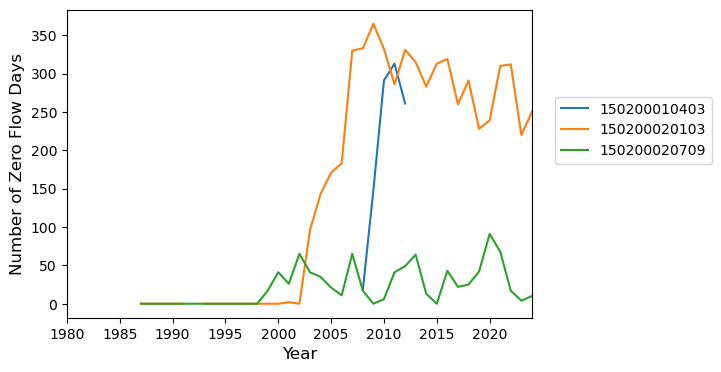

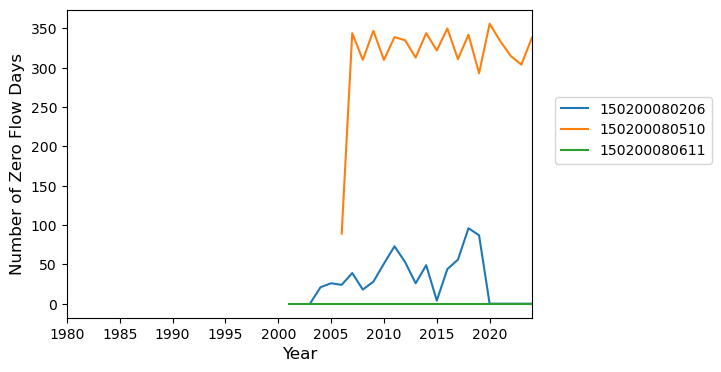

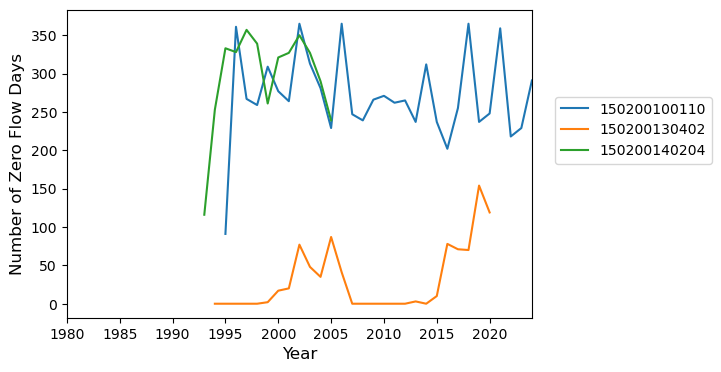

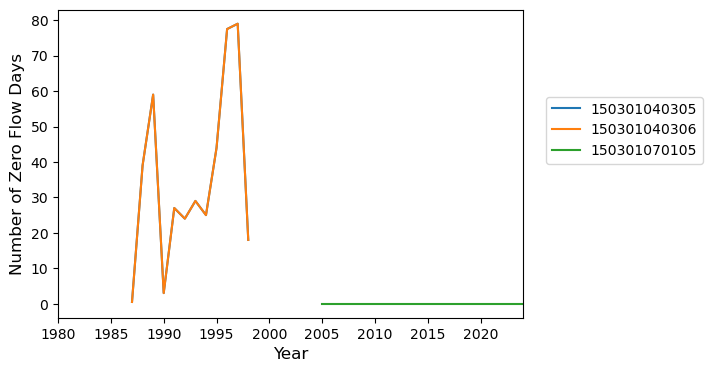

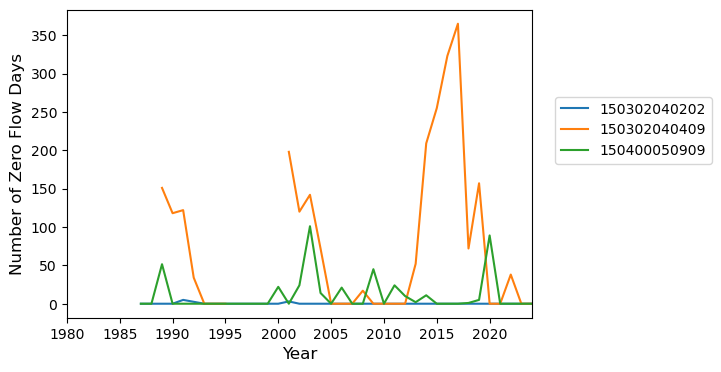

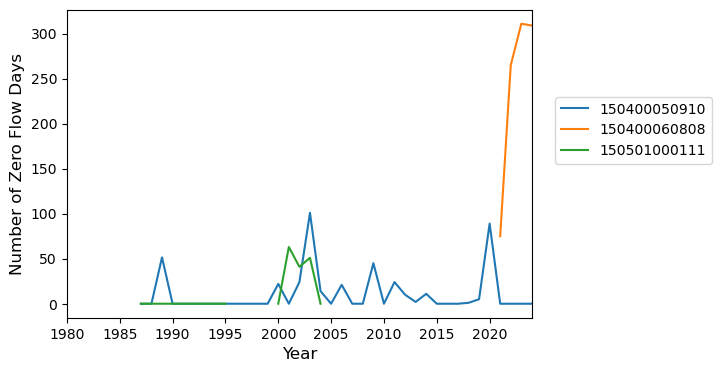

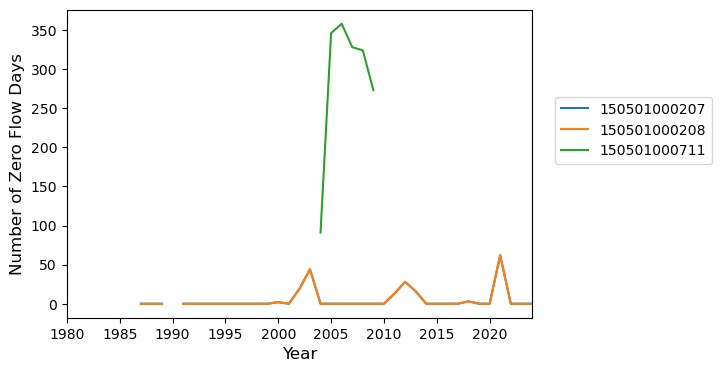

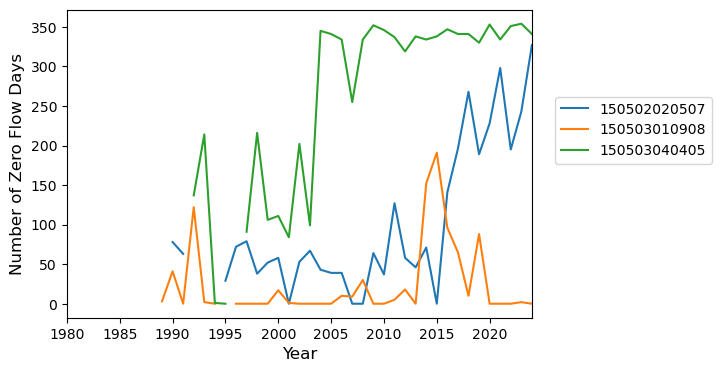

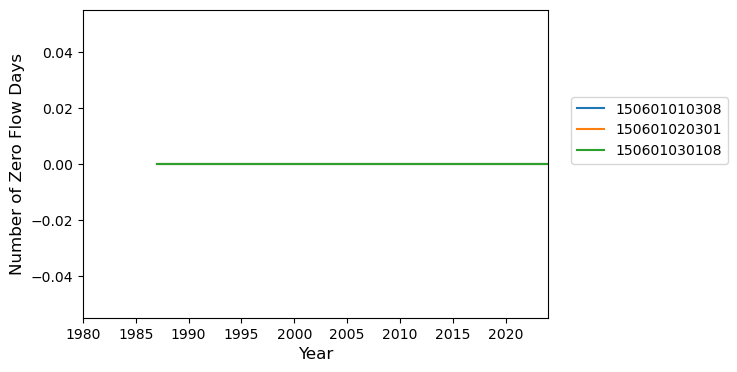

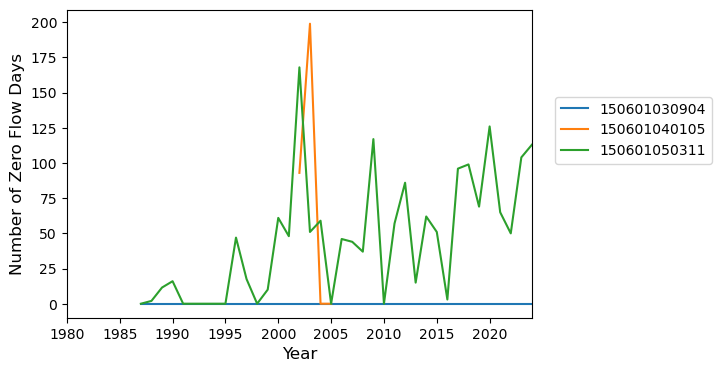

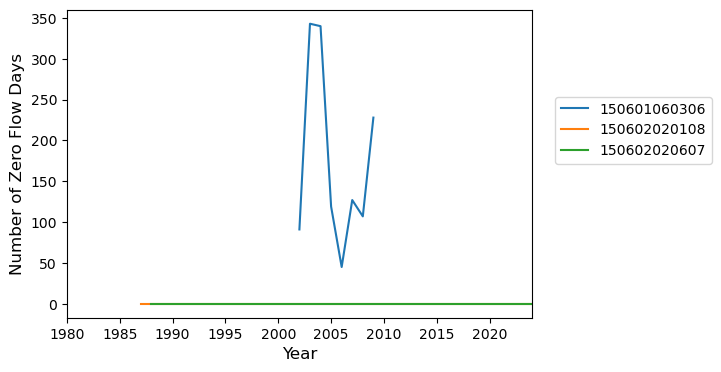

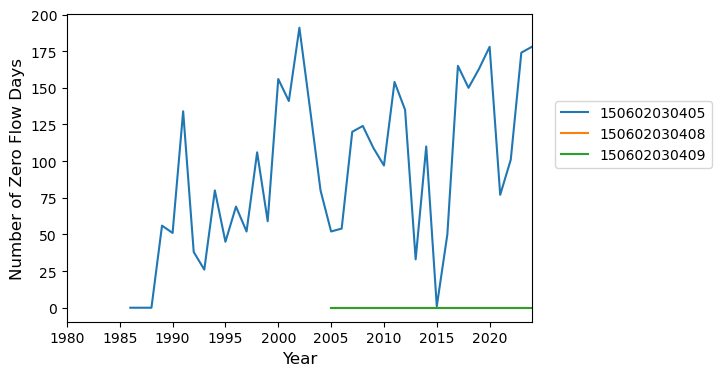

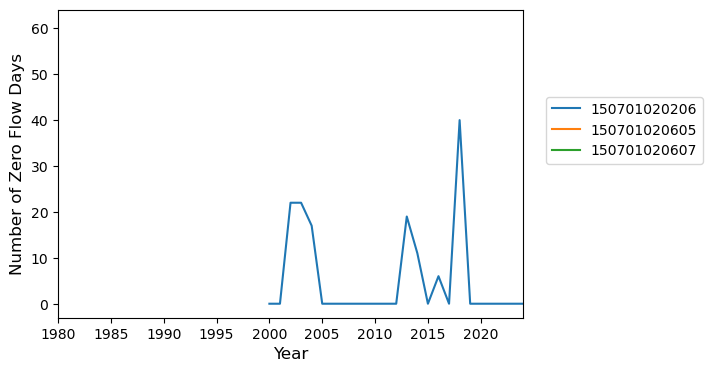

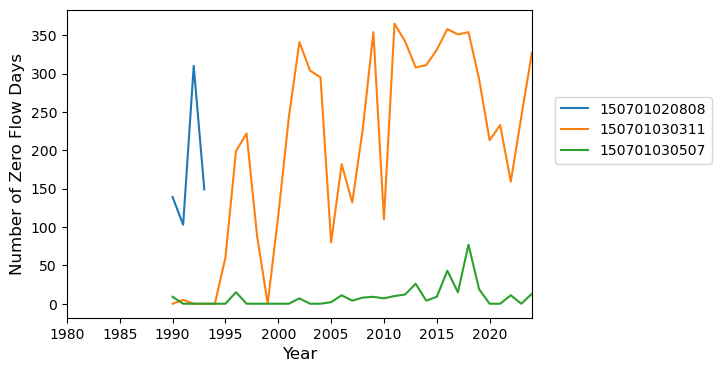

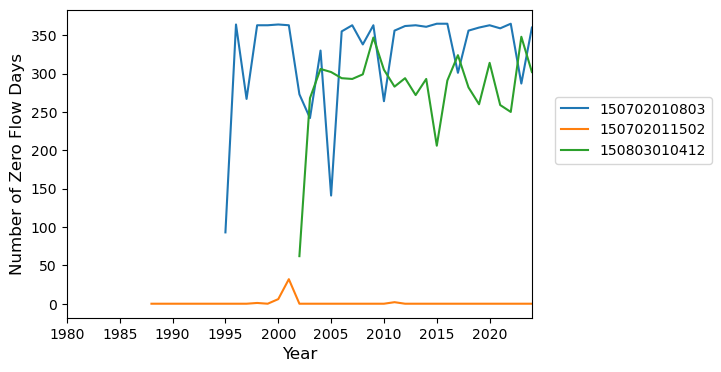

In [13]:
# Define dataset
# ds = wlanalysis_period[['1501','1502','1503','1504','1505','1506','1507','1508']]
ds = wlanalysis_period
min_yr = 1980
mx_yr = 2024
Name = "mean_" + StudyArea

# betterlabels = ['1501','1502','1503','1504','1505','1506','1507','1508']
betterlabels = ds.columns.tolist()

ylim = 800

f = ds[(ds.index >= min_yr) & (ds.index <= mx_yr)]
column_list = ds.columns.tolist()

stats = pd.DataFrame()

# Compute statistics
for col in column_list:
    df = f[col]
    y = np.array(df.values, dtype=float)
    x = np.array(df.index.values, dtype=float)  

    # Linear regression stats
    slope, intercept, r_value, p_value, std_err = sp.linregress(x, y)

    # Append statistics
    stats = stats._append({
        'slope': slope, 
        'int': intercept, 
        'rsq': r_value * r_value, 
        'p_val': p_value, 
        'std_err': std_err, 
        'mean': np.mean(y),
        'var': np.var(y),
        'sum': np.sum(y)
    }, ignore_index=True)

stats.index = betterlabels
stats1 = stats.transpose()
print(stats1)

# ---- Plot in Groups ----
batch_size = 3
for i in range(0, len(column_list), batch_size):
    fig, ax = plt.subplots(figsize=(6, 4))

    for col in column_list[i:i+batch_size]:  # Select four at a time
        ax.plot(ds[col], label=col)  
    
    # Formatting
    # ax.set_ylim(ylim, 0)
    ax.set_xticks(np.arange(min_yr, mx_yr + 1, 5))
    ax.set_xlim(min_yr, mx_yr)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Number of Zero Flow Days', fontsize=12)
    ax.legend(loc=[1.05,0.5])

    # Show each figure before saving
    plt.show()


In [14]:
f=wlanalysis_period.copy()
f.index = pd.to_datetime(f.index, format='%Y')


In [15]:
# Create a 'decade' column
f['decade'] = (f.index.year // 10) * 10  # Floors year to the nearest decade

# Group by decade and take the mean or median
zeroflow_per_decade = f.groupby("decade").mean()  # Change to .mean() if needed


In [16]:
zeroflow_per_decade

index,150100010508,150100010607,150100010608,150100020101,150100020405,150100020908,150100020909,150100100208,150100100602,150200010403,...,150602030409,150701020206,150701020605,150701020607,150701020808,150701030311,150701030507,150702010803,150702011502,150803010412
decade,,,,,,,,,,,,,,,,,,,,,
1980,0.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,18.0,18.0,NaN,NaN,NaN,NaN,0.0,NaN
1990,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,61.0,61.0,175.25,57.4,2.4,290.0,0.1,NaN
2000,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,83.000000,...,0.0,6.1,NaN,NaN,NaN,227.4,4.1,313.2,3.8,271.375
2010,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,288.333333,...,0.0,7.6,NaN,NaN,NaN,312.3,22.2,345.3,0.2,281.000
2020,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,NaN,NaN,NaN,235.2,4.8,346.8,0.0,294.600


In [17]:
zeroflow_per_decade = zeroflow_per_decade.dropna(axis=1, how='all')
zeroflow_per_decade = zeroflow_per_decade.transpose()
zeroflow_per_decade.reset_index(inplace=True)
zeroflow_per_decade

decade,index,1980,1990,2000,2010,2020
0,150100010508,0.000000,0.000000,0.000000,NaN,NaN
1,150100010607,NaN,0.000000,NaN,NaN,NaN
2,150100010608,NaN,0.000000,NaN,NaN,NaN
3,150100020101,NaN,NaN,NaN,0.000000,0.0
4,150100020405,0.000000,0.000000,NaN,NaN,NaN
5,150100020908,NaN,0.000000,0.000000,0.000000,0.0
6,150100020909,NaN,0.000000,0.000000,0.000000,0.0
7,150100100208,1.000000,0.000000,0.000000,0.000000,0.0
8,150100100602,1.000000,0.000000,0.000000,0.000000,0.0
9,150200010403,NaN,NaN,83.000000,288.333333,NaN


In [18]:
zeroflow_per_decade = zeroflow_per_decade.rename(columns = {'index':Naming_col})

In [20]:
zeroflow_per_decade.to_csv(outputpath+f'/{StudyArea}_MeanDecadalZeroFlow.csv')

In [36]:
gdf = shapefile.copy()
# Ensure HUC12 is the same type in both datasets (str is often safest)
gdf[Naming_col] = gdf[Naming_col].astype(str)
zeroflow_per_decade[Naming_col] = zeroflow_per_decade[Naming_col].astype(str)

# Perform the join (left join to keep all spatial data)
merged_gdf = gdf.merge(zeroflow_per_decade, on=Naming_col, how="left")
merged_gdf

,permanent_,gnis_name,reachcode,streamorde,ID,huc12,huc_name,fcode,hydroseq,geometry,1980,1990,2000,2010,2020
0,67120165,Tse Bonito Wash,15020006000324,3,NaN,150200060603,Tse Bonita Wash,46007,4.000080e+13,"LINESTRING Z (-108.94868 35.67165 0.00000, -10...",NaN,NaN,NaN,NaN,NaN
1,67121173,NaN,15020006000758,3,NaN,150200060404,Headwaters Defiance Draw,46007,4.000080e+13,"LINESTRING Z (-108.91989 35.64257 0.00000, -10...",NaN,NaN,NaN,NaN,NaN
2,67120427,NaN,15020006000759,3,NaN,150200060404,Headwaters Defiance Draw,46007,4.000080e+13,"LINESTRING Z (-108.91691 35.66162 0.00000, -10...",NaN,NaN,NaN,NaN,NaN
3,67120223,NaN,15020006003298,3,NaN,150200060404,Headwaters Defiance Draw,46007,4.000080e+13,"LINESTRING Z (-108.89878 35.67348 0.00000, -10...",NaN,NaN,NaN,NaN,NaN
4,67121513,NaN,15020006000758,3,NaN,150200060404,Headwaters Defiance Draw,46007,4.000080e+13,"LINESTRING Z (-108.90904 35.62311 0.00000, -10...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301875,79070510,Henrieville Creek,14070007000189,4,09381000,140700070105,Henrieville Creek,46006,4.100010e+13,"LINESTRING Z (-111.97042 37.56902 0.00000, -11...",NaN,NaN,NaN,NaN,NaN
301876,79070510,Henrieville Creek,14070007000189,4,373549111545201,140700070105,Henrieville Creek,46006,4.100010e+13,"LINESTRING Z (-111.97042 37.56902 0.00000, -11...",NaN,NaN,NaN,NaN,NaN
301877,79070510,Henrieville Creek,14070007000189,4,373549111545201,140700070105,Henrieville Creek,46006,4.100010e+13,"LINESTRING Z (-111.97042 37.56902 0.00000, -11...",NaN,NaN,NaN,NaN,NaN
301878,79070656,Little Creek,14070007000191,3,NaN,140700070105,Henrieville Creek,46003,4.100010e+13,"LINESTRING Z (-111.94213 37.56490 0.00000, -11...",NaN,NaN,NaN,NaN,NaN


In [37]:
if "geometry" not in merged_gdf.columns:
    print("No geometry column detected! Check your shapefile merge.")


In [38]:
# Rename columns to avoid integer-only names
merged_gdf = merged_gdf.rename(columns={col: f"{col}-Decade-zflow" for col in merged_gdf.columns if isinstance(col, int)})
merged_gdf

,permanent_,gnis_name,reachcode,streamorde,ID,huc12,huc_name,fcode,hydroseq,geometry,1980-Decade-zflow,1990-Decade-zflow,2000-Decade-zflow,2010-Decade-zflow,2020-Decade-zflow
0,67120165,Tse Bonito Wash,15020006000324,3,NaN,150200060603,Tse Bonita Wash,46007,4.000080e+13,"LINESTRING Z (-108.94868 35.67165 0.00000, -10...",NaN,NaN,NaN,NaN,NaN
1,67121173,NaN,15020006000758,3,NaN,150200060404,Headwaters Defiance Draw,46007,4.000080e+13,"LINESTRING Z (-108.91989 35.64257 0.00000, -10...",NaN,NaN,NaN,NaN,NaN
2,67120427,NaN,15020006000759,3,NaN,150200060404,Headwaters Defiance Draw,46007,4.000080e+13,"LINESTRING Z (-108.91691 35.66162 0.00000, -10...",NaN,NaN,NaN,NaN,NaN
3,67120223,NaN,15020006003298,3,NaN,150200060404,Headwaters Defiance Draw,46007,4.000080e+13,"LINESTRING Z (-108.89878 35.67348 0.00000, -10...",NaN,NaN,NaN,NaN,NaN
4,67121513,NaN,15020006000758,3,NaN,150200060404,Headwaters Defiance Draw,46007,4.000080e+13,"LINESTRING Z (-108.90904 35.62311 0.00000, -10...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301875,79070510,Henrieville Creek,14070007000189,4,09381000,140700070105,Henrieville Creek,46006,4.100010e+13,"LINESTRING Z (-111.97042 37.56902 0.00000, -11...",NaN,NaN,NaN,NaN,NaN
301876,79070510,Henrieville Creek,14070007000189,4,373549111545201,140700070105,Henrieville Creek,46006,4.100010e+13,"LINESTRING Z (-111.97042 37.56902 0.00000, -11...",NaN,NaN,NaN,NaN,NaN
301877,79070510,Henrieville Creek,14070007000189,4,373549111545201,140700070105,Henrieville Creek,46006,4.100010e+13,"LINESTRING Z (-111.97042 37.56902 0.00000, -11...",NaN,NaN,NaN,NaN,NaN
301878,79070656,Little Creek,14070007000191,3,NaN,140700070105,Henrieville Creek,46003,4.100010e+13,"LINESTRING Z (-111.94213 37.56490 0.00000, -11...",NaN,NaN,NaN,NaN,NaN


In [39]:
merged_gdf.to_file(outputpath+f'/{Naming_col}bufferedflowlines_MeanDecadalZeroFlow.shp')

C:\Users\det19\AppData\Local\Temp\ipykernel_31976\856855228.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_gdf.to_file(outputpath+f'/{Naming_col}bufferedflowlines_MeanDecadalZeroFlow.shp')
